In [8]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib inline

In [9]:
# Number of pairs feature/label.
M = 1000

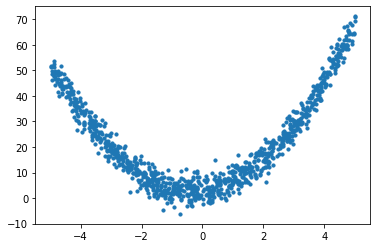

In [10]:
# Input values (features)

x = np.random.uniform(-5,5,M).reshape(M,1)
w = np.random.normal(0,np.sqrt(10),M).reshape(M,1)

# Output values (targets).
y = 3 + 1.5*x+ 2.3*np.square(x) + w

# Plot x and y
plt.scatter(x,y, s=10)
plt.show()

In [11]:
# Closed-form solution.
X = np.c_[np.ones((M, 1)),x, np.square(x)] # add x0 = 1 to each instance
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0]+ a_opt[1]*x + a_opt[2]*np.square(x)
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )


In [12]:
#Print a optimum

print('a0: %1.4f' % (a_opt[0]))
print('a1: %1.4f' % (a_opt[1]))
print('a2: %1.4f' % (a_opt[2]))


a0: 3.1180
a1: 1.5280
a2: 2.3007


In [13]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.001
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.zeros((3,1))
a[0] = 10*np.random.random_sample();
a[1] = 10*np.random.random_sample();
a[2] = 10*np.random.random_sample();

# Create vector for parameter history.
a_hist = np.zeros((3, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]
a_hist[2, 0] = a[2]

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))


# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((3, n_iterations))
#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/M * X.T.dot(y - X.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    grad_hist[2, iteration] = gradients[2]
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    a_hist[2, iteration+1] = a[2]
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    iteration = iteration + 1

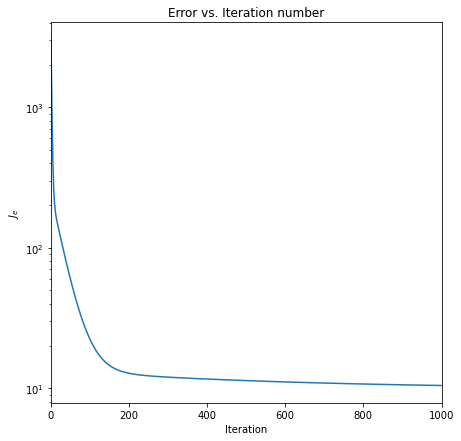

<Figure size 432x288 with 0 Axes>

In [14]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)